In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import os
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


In [8]:



seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

# Set paths
base_dir = "Data"
train_dir = os.path.join(base_dir, "train")
valid_dir = os.path.join(base_dir, "valid")
test_dir = os.path.join(base_dir, "test")

# Parameters
IMG_SIZE = 224
BATCH_SIZE = 32

# Load datasets using image_dataset_from_directory
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="binary",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    valid_dir,
    labels="inferred",
    label_mode="binary",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="binary",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False
)

# Improve performance with prefetching
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)


Found 280 files belonging to 2 classes.
Found 59 files belonging to 2 classes.
Found 59 files belonging to 2 classes.


In [9]:
model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(IMG_SIZE, IMG_SIZE, 3)),  # normalize
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Sigmoid binary output
])


In [10]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10  # Try increasing later
)


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 367ms/step - accuracy: 0.5734 - loss: 1.3321 - val_accuracy: 0.6441 - val_loss: 0.6538
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 357ms/step - accuracy: 0.6608 - loss: 0.6273 - val_accuracy: 0.6441 - val_loss: 0.6466
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 365ms/step - accuracy: 0.7009 - loss: 0.6138 - val_accuracy: 0.6441 - val_loss: 0.6189
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 364ms/step - accuracy: 0.6614 - loss: 0.5745 - val_accuracy: 0.6949 - val_loss: 0.5822
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 368ms/step - accuracy: 0.7512 - loss: 0.5298 - val_accuracy: 0.7797 - val_loss: 0.5315
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 373ms/step - accuracy: 0.7077 - loss: 0.5027 - val_accuracy: 0.7966 - val_loss: 0.5322
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 377ms/step - accuracy: 0.7547 - loss: 0.5062 - val_accuracy: 0.7119 - val_loss: 0.5722
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 373ms/step - accuracy: 0.7850 - loss: 0.4421 - val_accuracy: 0.8136 - val_loss:

In [11]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.2f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.8480 - loss: 0.4165
Test Accuracy: 0.88


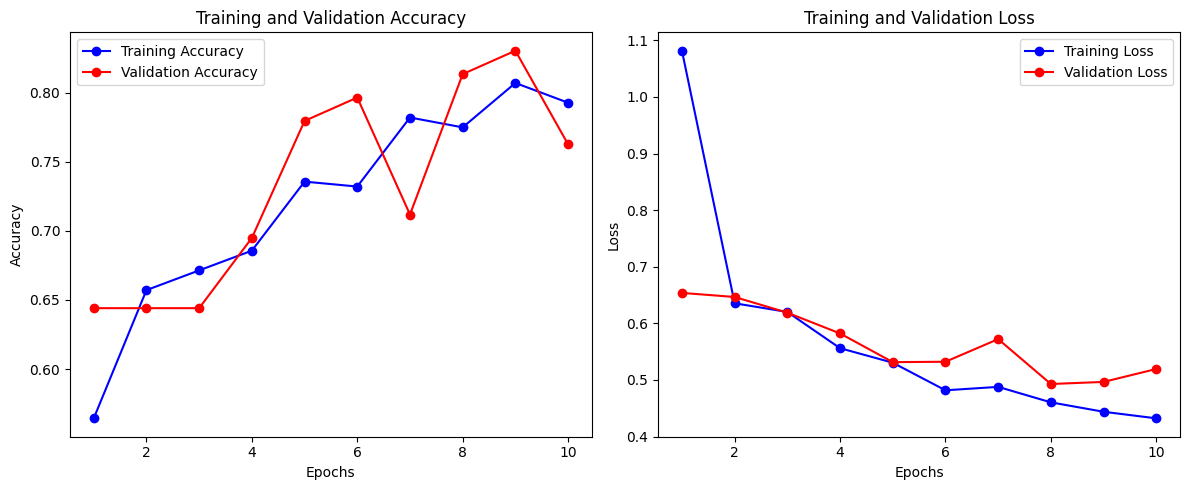

In [12]:
import matplotlib.pyplot as plt

# Extract accuracy and loss from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [13]:
y_true = []
y_pred = []

for images, labels in test_ds:
    probs = model.predict(images).flatten()
    preds = (probs > 0.5).astype(int)
    y_true.extend(labels.numpy())
    y_pred.extend(preds)

# Display confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["Not Fallen", "Fallen"]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Confusion Matrix:
[[ 8  7]
 [ 0 44]]

Classification Report:
              precision    recall  f1-score   support

  Not Fallen       1.00      0.53      0.70        15
      Fallen       0.86      1.00      0.93        44

    accuracy                           0.88        59
   macro avg       0.93      0.77      0.81        59
weighted avg       0.90      0.88      0.87        59



2025-07-21 15:30:59.375815: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
